<a href="https://colab.research.google.com/github/karad1818/Python_Project/blob/main/Tree%20Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1,2,3,4,5,6,7,8,9,null,10,11,null,12
height : 3


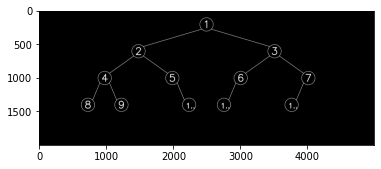

In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as draw
import math


# img = draw_circle_text(img,2,900,800)
# img = draw_line(img,570,470,830,730)


# img = draw_circle_text(img,3,100,800)
# img = draw_line(img,430,470,170,730)

store = dict()
store[1] = [2500,200]

# list_of_node = [1,2,3,4,5,6,7,8,9,12,10,11,13,14,15]
inp = str(input())
list_of_node = inp.split(',')
# print(l)
height = math.floor(math.log2(len(list_of_node)))

print("height : "+str(height))
queue = [1]
color = (255,255,255);

def draw_circle_text(img,number,x,y):
  py = y + 50
  px = x - 50
  img = cv.circle(img,(x,y),100,color,3)
  st = str(number)
  if len(st)>1:
    st = st[0] + ".."
    img = cv.putText(img,st,(px,py),cv.FONT_HERSHEY_SIMPLEX,3.5,color,10,cv.LINE_AA)
  else:
    img = cv.putText(img,st,(px,py),cv.FONT_HERSHEY_SIMPLEX,5,color,10,cv.LINE_AA)
  return img

def draw_line(img,x1,y1,x2,y2):
  return cv.line(img,(x1,y1),(x2,y2),color,3)

def right_child(img,number,px,py,space):
  global store
  cx = px + space
  cy = py + 400
  store[number] = [cx,cy]
  lx1 = px + 70 
  lx2 = cx - 70
  ly1 = py + 70
  ly2 = cy - 70
  img = draw_line(img,lx1,ly1,lx2,ly2)
  return draw_circle_text(img,number,cx,cy)

def left_child(img,number,px,py,space):
  global store
  cx = px - space
  cy = py + 400
  store[number] = [cx,cy]
  lx1 = px - 70
  lx2 = cx + 70
  ly1 = py + 70
  ly2 = cy - 70
  img = draw_line(img,lx1,ly1,lx2,ly2)
  return draw_circle_text(img,number,cx,cy)

# create empty blank image
img = np.zeros((2000,5000),dtype=np.uint8)

# parent node
img = draw_circle_text(img,1,2500,200)

level = 0
p = 2
for i in range(1,len(list_of_node),2):
  front = queue[0]
  px = store[front][0]
  py = store[front][1]
  # print(px,py)
  queue.pop(0)
  h = 2**(height-1)
  space = (h*500+(h-1)*10)//2
  space = int(space)
  if list_of_node[i]!= 'null':
    queue.append(list_of_node[i])
    img = left_child(img,list_of_node[i],px,py,space)

  if i+1 < len(list_of_node) and list_of_node[i+1] != 'null':
    queue.append(list_of_node[i+1])
    img = right_child(img,list_of_node[i+1],px,py,space)

  level += 2
  if level % p == 0:
    height -= 1
    level = 0
    p *= 2

img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
draw.imshow(img)

# for i,j in store.items():
  # print(str(i) + "-->" + str(j[0]) + ", " + str(j[1]))